In [1]:
%matplotlib inline

import sympy
from sympy.abc import pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [2]:
rc('animation', html='html5')

In [20]:
class PiSimulator:
    
    def __init__(self, rand_pts):
        """
        Sets up the figure and the axes for the animation.
        """
        self.iterations = 0
        self.count = 0
        self.rand_pts = rand_pts
        self.pause = False
        
        # create fig and axes
        self.fig, self.axs = plt.subplots(2, 1)
        self.fig.set_size_inches(8, 18)
        
        # Data is empty at beginning of animation
        self.scat_in_xdata, self.scat_in_ydata = [], []
        self.scat_out_xdata, self.scat_out_ydata = [], []
        self.iter_data, self.approx_data = [], []

        # Draw unit circle and set x and y axis limits
        self.setup_top()
        self.scat_in = self.axs[0].scatter([], [], alpha=0.6, s=16)
        self.scat_out = self.axs[0].scatter([], [], alpha=0.6, s=16, color='r')
        
        # Plot horizontal line for value of pi in second plot
        self.setup_bottom()
        self.line, = self.axs[1].plot([], [], color='orange')
        self.annotation = self.axs[1].annotate("", (6000, 0.5))

        
    def setup_top(self):
        circle = plt.Circle(xy=(0, 0), radius=1, fill=False, color='b')
        self.axs[0].add_artist(circle)
        self.axs[0].set_xlim(-1, 1)
        self.axs[0].set_ylim(-1, 1)
    
    def setup_bottom(self):
        self.axs[1].axhline(y=np.pi)
        self.axs[1].axhline(y=0, color='k')
        self.axs[1].axvline(x=0, color='k')
        self.axs[1].set_yticks([0, 1, 2, 3, 3.14, 4, 5])
        self.axs[1].set_yticklabels(['0', '', '2.0', '', '3.14', '4.0', ''])
        self.axs[1].set_xlim(0, 10000)
        self.axs[1].set_ylim(-1, 5)
        self.axs[1].set_xlabel("Iterations", fontsize=11, labelpad=10)
        self.axs[1].annotate("Approximate value for " + sympy.pretty(pi) + " :", (3000, 0.5))
    
    def calc_approx(self):
        """
        Returns the approximation of pi at current iteration: (num in circle) / (total points) * (area of square)
        """
        return (self.count / self.iterations) * 4

    def animate(self, i):
        
        if not self.pause:
            iter_per_frame = 10

            for j in range(iter_per_frame):

                self.iterations += 1

                if np.sum(rand_pts[10*i + j] ** 2) <= 1:
                    self.count += 1
                    self.scat_in_xdata.append(rand_pts[10*i + j, 0])
                    self.scat_in_ydata.append(rand_pts[10*i + j, 1])

                else:
                    self.scat_out_xdata.append(rand_pts[10*i + j, 0])
                    self.scat_out_ydata.append(rand_pts[10*i + j, 1])

            self.scat_in.set_offsets(np.c_[self.scat_in_xdata, self.scat_in_ydata])
            self.scat_out.set_offsets(np.c_[self.scat_out_xdata, self.scat_out_ydata])

            approx = self.calc_approx()

            self.iter_data.append(self.iterations)
            self.approx_data.append(approx)
            self.line.set_data(self.iter_data, self.approx_data)
            self.annotation.set_text(str(round(approx, 5)))
            
            if i == 999:
                self.pause = True
                print("Pause set to false.")
                
            
        return self.line,
        
    def create_animation(self, n):
        return animation.FuncAnimation(self.fig, self.animate, frames=n, interval=20, blit=True)



In [4]:
# Create full array of random points outside in order to improve performance
rand_pts = np.random.uniform(-1, 1, size=(10000, 2))

Pause set to false.


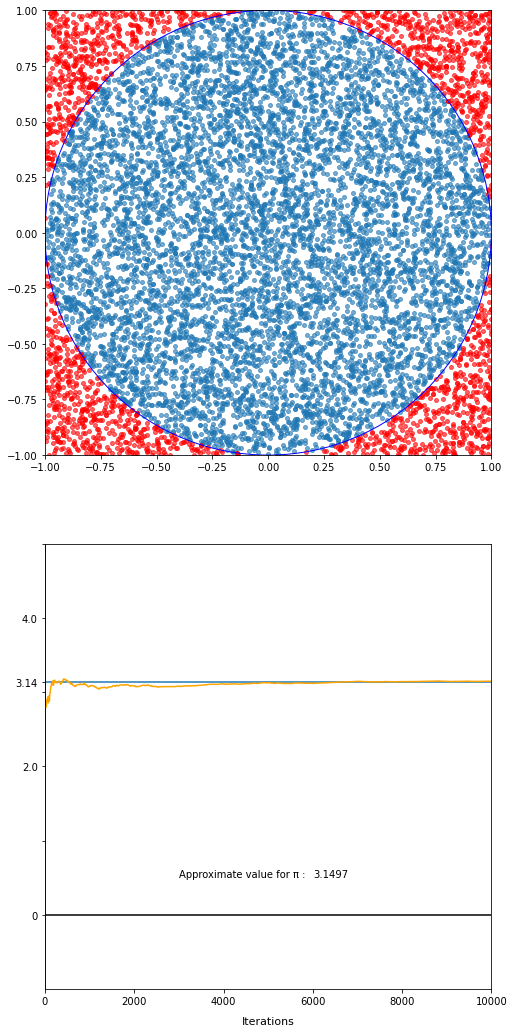

In [21]:
n = 1000 # number of frames, not iterations. (num_iterations = 10*n)
pause_len = 100 # add 100 to add pause of 2 seconds at the end.

sim = PiSimulator(rand_pts)
anim = sim.create_animation(n + pause_len)

display(anim)
